In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df=pd.read_csv("C:/Users/user/Desktop/Sentiment analysis of Financial News/Data/Financial News.csv",encoding="ISO-8859-1")
pd.set_option("display.max_colwidth",None)
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .


In [89]:
df.shape

(4845, 2)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [91]:
df.columns=["Sentiment","Sentence"]

In [92]:
df.describe()

,Sentiment,Sentence
count,4845,4845
unique,3,4837
top,neutral,"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. ."
freq,2878,2


In [93]:
df.isnull().sum()

Sentiment    0
Sentence     0
dtype: int64

In [94]:
df["Sentiment"].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [95]:
df["Sentiment"].value_counts(normalize=True)*100

Sentiment
neutral     59.401445
positive    28.132095
negative    12.466460
Name: proportion, dtype: float64

In [96]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [97]:
df.shape

(4839, 2)

In [98]:
df["char_length"]=df["Sentence"].str.len()

In [99]:
df["word_Count"]=df["Sentence"].str.split().apply(len)

In [100]:
df["word_Count"].describe()

count    4839.000000
mean       23.088035
std         9.938780
min         2.000000
25%        16.000000
50%        21.000000
75%        29.000000
max        81.000000
Name: word_Count, dtype: float64

In [101]:
df["char_length"].describe()

count    4839.000000
mean      128.070469
std        56.418465
min         9.000000
25%        84.000000
50%       119.000000
75%       163.000000
max       315.000000
Name: char_length, dtype: float64

In [102]:
df.groupby("Sentiment")["word_Count"].mean()

Sentiment
negative    23.903974
neutral     22.155989
positive    24.690389
Name: word_Count, dtype: float64

In [103]:
df[["char_length","word_Count"]].describe()

,char_length,word_Count
count,4839.000000,4839.000000
mean,128.070469,23.088035
std,56.418465,9.938780
min,9.000000,2.000000
25%,84.000000,16.000000
50%,119.000000,21.000000
75%,163.000000,29.000000
max,315.000000,81.000000


In [104]:
np.percentile(df["word_Count"],[5,95])

array([10., 42.])

In [105]:
df[df["word_Count"]<3]

,Sentiment,Sentence,char_length,word_Count
1115,neutral,Welcome !,9,2


In [106]:
df.shape

(4839, 4)

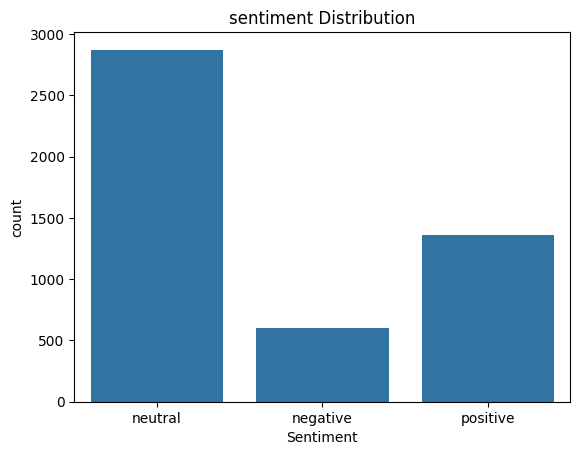

In [107]:
plt.figure()
sns.countplot(x="Sentiment",data=df)
plt.title("sentiment Distribution")
plt.show()

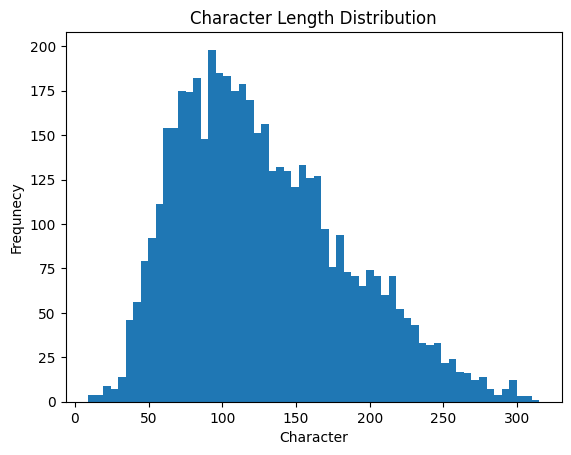

In [108]:
plt.figure()
plt.hist(df["char_length"],bins=60)
plt.title("Character Length Distribution")
plt.xlabel("Character")
plt.ylabel("Frequnecy")
plt.show()

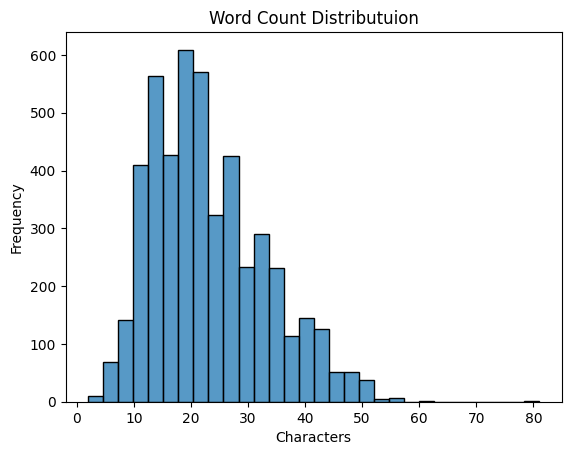

In [109]:
plt.figure()
sns.histplot(df["word_Count"],bins=30)
plt.title("Word Count Distributuion")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

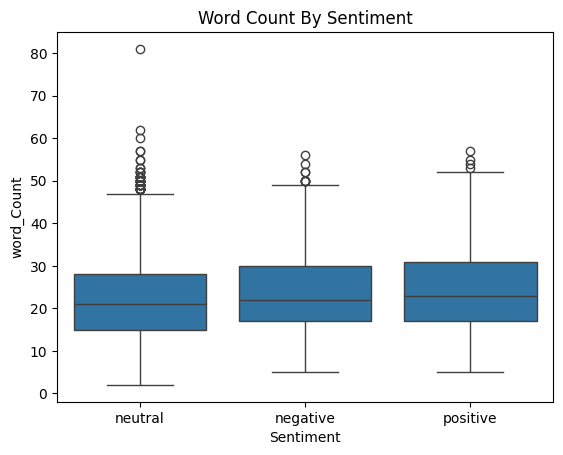

In [110]:
plt.figure()
sns.boxplot(x="Sentiment",y="word_Count",data=df)
plt.title("Word Count By Sentiment")
plt.show()

In [111]:
df["word_Count"].quantile([0.90,0.95,0.99])

0.90    37.0
0.95    42.0
0.99    50.0
Name: word_Count, dtype: float64

In [112]:
df_vis=df[df["word_Count"]<=50]

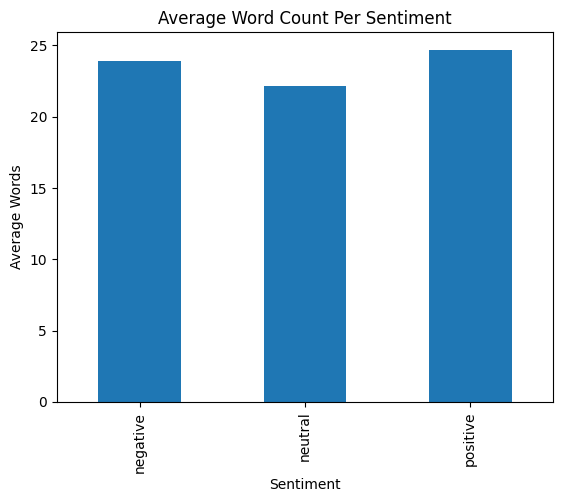

In [113]:
avg_length=df.groupby("Sentiment")["word_Count"].mean()
plt.figure()
avg_length.plot(kind="bar")
plt.title("Average Word Count Per Sentiment")
plt.ylabel("Average Words")
plt.show()

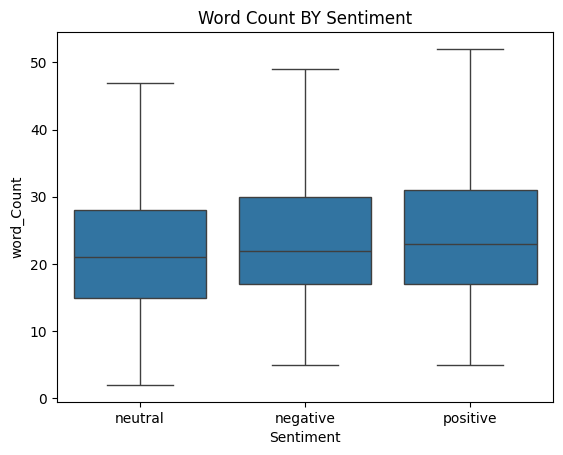

In [114]:
plt.figure()
sns.boxplot(
    x="Sentiment",
    y="word_Count",
    data=df,
    showfliers=False
)
plt.title("Word Count BY Sentiment")
plt.show()

In [115]:
from wordcloud import WordCloud

In [116]:
text_data="".join(df["Sentence"].astype(str))
wordcloud=WordCloud(
    width=800,
    height=600,
    background_color="white"
).generate(text_data)

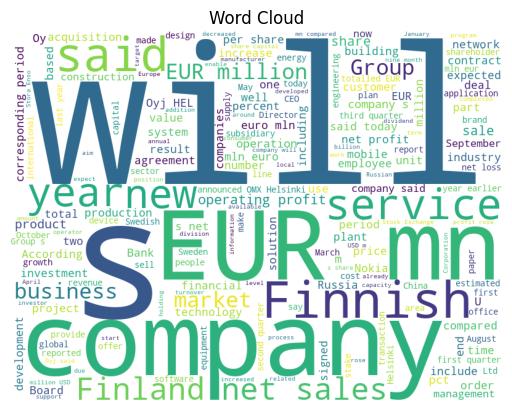

In [117]:
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud")
plt.show()

In [118]:
df.head()

,Sentiment,Sentence,char_length,word_Count
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",190,31
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",228,36
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,206,33
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",203,41
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,178,25


In [121]:
df.to_csv("EDA",index=False)

In [ ]:
df